by uramoon@kw.ac.kr<br>
원본 출처: https://github.com/rickiepark/deep-learning-with-python-notebooks <a href="https://github.com/rickiepark/deep-learning-with-python-notebooks/blob/master/LICENSE">(MIT License)</a>

In [ ]:
import keras
keras.__version__

# 신경망과의 첫 만남

이 노트북은 [케라스 창시자에게 배우는 딥러닝](https://tensorflow.blog/케라스-창시자에게-배우는-딥러닝/) 책의 2장 1절의 코드 예제입니다. 책에는 더 많은 내용과 그림이 있습니다. 이 노트북에는 소스 코드에 관련된 설명만 포함합니다. 이 노트북의 설명은 케라스 버전 2.2.2에 맞추어져 있습니다. 케라스 최신 버전이 릴리스되면 노트북을 다시 테스트하기 때문에 설명과 코드의 결과가 조금 다를 수 있습니다.

----

케라스 파이썬 라이브러리를 사용하여 손글씨 숫자 분류를 학습하는 구체적인 신경망 예제를 살펴보겠습니다. 케라스나 비슷한 라이브러리를 사용한 경험이 없다면 당장은 이 첫 번째 예제를 모두 이해하지 못할 것입니다. 아직 케라스를 설치하지 않았을지도 모릅니다. 괜찮습니다. 다음 장에서 이 예제를 하나하나 자세히 설명합니다. 코드가 좀 이상하거나 요술처럼 보이더라도 너무 걱정하지 마세요. 일단 시작해 보겠습니다.

여기에서 풀려고 하는 문제는 흑백 손글씨 숫자 이미지(28x28 픽셀)를 10개의 범주(0에서 9까지)로 분류하는 것입니다. 머신 러닝 커뮤니티에서 고전으로 취급받는 데이터셋인 MNIST를 사용하겠습니다. 이 데이터셋은 머신 러닝의 역사만큼 오래되었고 많은 연구에 사용되었습니다. 이 데이터셋은 1980년대에 미국 국립표준기술연구소에서 수집한 6만 개의 훈련 이미지와 1만 개의 테스트 이미지로 구성되어 있습니다. MNIST 문제를 알고리즘이 제대로 작동하는지 확인하기 위한 딥러닝계의 ‘Hello World’라고 생각해도 됩니다. 머신 러닝 기술자가 되기까지 연구 논문이나 블로그 포스트 등에서 MNIST를 보고 또 보게 될 것입니다.

MNIST 데이터셋은 넘파이 배열 형태로 케라스에 이미 포함되어 있습니다:

In [1]:
# MNIST 데이터셋 불러오기
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


`train_images`와 `train_labels`가 모델이 학습해야 할 훈련 세트를 구성합니다. 모델은 `test_images`와 `test_labels`로 구성된 테스트 세트에서 테스트될 것입니다. 이미지는 넘파이 배열로 인코딩되어 있고 레이블은 0에서부터 9까지의 숫자 배열입니다. 이미지와 레이블은 일대일 관계를 가집니다.

훈련 데이터를 살펴보겠습니다:

In [2]:
# 훈련 이미지 모양 (묶음, 행, 열)
train_images.shape

(60000, 28, 28)

In [3]:
# 훈련 레이블 모양
train_labels.shape

(60000,)

In [4]:
# 훈련 레이블 값
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

##TODO 1: 훈련 데이터의 이해

In [ ]:
# Q: train_images[2][3][4]은 무엇을 뜻할까요?
# A: 트레이닝 3번째이미지의 3행 4열의 픽셀 값 (0 ~ 255의 값을 지님)

# Q: train_labels[2]의 내용은 무엇을 뜻할까요?
# A: train_images 배열에서 3번째 이미지의 레이블

다음은 테스트 데이터입니다:

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
test_labels.shape

(10000,)

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

훈련 데이터의 다섯 번째 샘플을 맷플롯립 라이브러리를 사용해 확인해 보겠습니다.

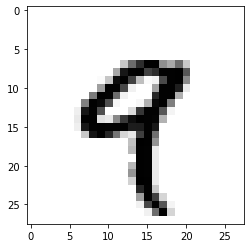

In [8]:
import matplotlib.pyplot as plt

digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

##TODO 2: 훈련 데이터 확인
for 문으로 train_images의 처음 세 장을 출력하여 5, 0, 4인지 확인해보자.


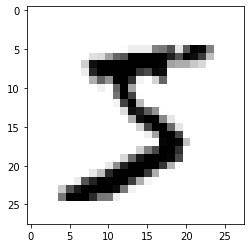

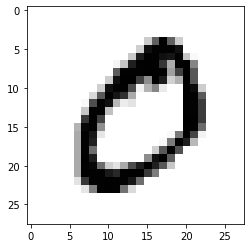

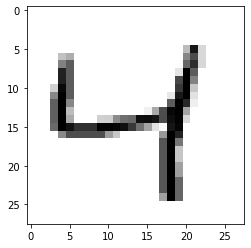

In [11]:
# 코드 작성
for i in range(3):
    digit = train_images[i]
    plt.imshow(digit, cmap=plt.cm.binary)
    plt.show()


## TODO 3: 테스트 데이터 확인
for 문으로 test_images 마지막 세 장을 출력하여 4, 5, 6인지 확인해보자.

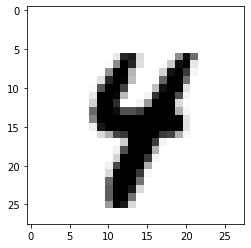

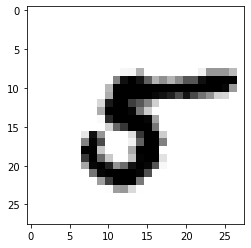

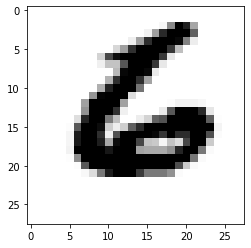

In [12]:
# 코드 작성
for i in range(len(test_images)-3, len(test_images)):
    digit = test_images[i]
    plt.imshow(digit, cmap=plt.cm.binary)
    plt.show()


작업 순서는 다음과 같습니다. 먼저 훈련 데이터 `train_images`와 `train_labels`를 네트워크에 주입합니다. 그러면 네트워크는 이미지와 레이블을 연관시킬 수 있도록 학습됩니다. 마지막으로 `test_images`에 대한 예측을 네트워크에게 요청합니다. 그리고 이 예측이 `test_labels`와 맞는지 확인할 것입니다.

신경망을 만들어 보겠습니다. 여기에서도 다음 코드를 완전히 이해하지 않아도 괜찮습니다.

In [13]:
from keras import models
from keras import layers

# 순차 모델 생성
network = models.Sequential()

# 네트워크에 입력층 추가
# 입력에서 그림을 한 장씩 입력 받는데 한 장의 그림에는 픽셀이 28 * 28 개 있습니다.
network.add(layers.Input(shape=(28 * 28,)))

# 네트워크에 은닉층 (hidden layer) 추가 (입력도 아니고 출력도 아니면 은닉층입니다.)
# 은닉층에는 512개의 유닛(퍼셉트론)이 존재하고, 각 유닛은 28 * 28 개의 입력을 받습니다. (Densely or Fully Connected)
# 활성화 함수로는 ReLU를 사용합니다. 활성화 함수 종류: https://en.wikipedia.org/wiki/Activation_function
network.add(layers.Dense(512, activation='relu'))

# 네트워크에 출력층 추가 
# 출력 층에는 10개의 유닛이 존재하는 데 각 유닛은 주어진 그림이 0일 확률, 1일 확률, ..., 9일 확률을 출력합니다.
# 활성화 함수로 Softmax를 사용하여 상기 10개 확률의 합이 1이 되도록 만듭니다. (나중에 다시 설명)
# 각 유닛은 이 전 층의 512개의 유닛이 출력하는 모든 값을 입력으로 받습니다. (Densely or Fully Connected)
network.add(layers.Dense(10, activation='softmax'))

In [14]:
# 네트워크의 구조 보기
# 첫 번째 층 (은닉) 가중치 수 419120 = 입력 개수 (785 = 28*28[픽셀 수] + 1[bias, 절편]) * 유닛 개수 (512)
# 두 번째 층 (출력) 가중치 수   5130 = 입력 개수 (512 + 1) * 유닛 개수 (10)
# 지난 시간의 단일 퍼셉트론은 5 개의 가중치 값을 찾으면 됐는데 이 번에는 (512 + 10) 개의 퍼셉트론에서 총 407,050 개의 가중치 값을 찾아야 합니다.

network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


신경망의 핵심 구성 요소는 일종의 데이터 처리 필터라고 생각할 수 있는 층입니다. 어떤 데이터가 들어가면 더 유용한 형태로 출력됩니다. 조금 더 구체적으로 층은 주어진 문제에 더 의미 있는 표현을 입력된 데이터로부터 추출합니다. 대부분의 딥러닝은 간단한 층을 연결하여 구성되어 있고, 점진적으로 데이터를 정제하는 형태를 띠고 있습니다. 딥러닝 모델은 데이터 정제 필터(층)가 연속되어 있는 데이터 프로세싱을 위한 여과기와 같습니다.

이 예에서는 조밀하게 연결된 (또는 완전 연결된) 신경망 층인 `Dense` 층 2개가 연속되어 있습니다. 두 번째 (즉, 마지막) 층은 10개의 확률 점수가 들어 있는 배열(모두 더하면 1입니다)을 반환하는 소프트맥스 층입니다. 각 점수는 현재 숫자 이미지가 10개의 숫자 클래스 중 하나에 속할 확률입니다.

신경망이 훈련 준비를 마치기 위해서 컴파일 단계에 포함될 세 가지가 더 필요합니다:

* 손실 함수 : 훈련 데이터에서 신경망의 성능을 측정하는 방법으로 네트워크가 옳은 방향으로 학습될 수 있도록 도와 줍니다. <br>(지난 시간에 사용한 틀린 답안에 대해 1씩 커지는 0-1 Loss처럼 손실은 클 수록 좋지 않습니다.)
* 옵티마이저: 입력된 데이터와 손실 함수를 기반으로 네트워크를 업데이트하는 메커니즘입니다.<br>
(현재 상태에서 각 가중치를 어떻게 수정하면 손실이 작아지는 지 보통 미분을 통해 결정합니다.)
* 훈련과 테스트 과정을 모니터링할 지표 : 여기에서는 정확도(정확히 분류된 이미지의 비율)만 고려하겠습니다.

손실 함수와 옵티마이저의 정확한 목적은 이어지는 두 개의 장에서 자세히 설명하겠습니다.

In [15]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

훈련을 시작하기 전에 데이터를 네트워크에 맞는 크기로 바꾸고 모든 값을 0과 1 사이로 스케일을 조정합니다. 예를 들어, 앞서 우리의 훈련 이미지는 `[0, 255]` 사이의 값인 `uint8` 타입의 `(60000, 28, 28)` 크기를 가진 배열로 저장되어 있습니다. 이 데이터를 0과 1 사이의 값을 가지는 `float32` 타입의 `(60000, 28 * 28)` 크기의 배열로 바꿉니다.

In [16]:
# 인공 신경망에서는 모든 값을 보통 0부터 1사이의 실수로 변환합니다.
# 또한 합성곱 (Convolution Neural Network, CNN) 신경망의 등장 이전에는
# 이미지를 2차원으로 해석하는 능력이 부족했으므로 1차원 배열로 변환해야 합니다.
# (2차원 배열이라 하더라도 컴퓨터 메모리 상에는 1차원 배열로 저장됩니다.)

norm_train_images = train_images.reshape((60000, 28 * 28))      # 6만개의 일차원 배열로 재해석 (각 배열은 길이 784=28*28)
norm_train_images = norm_train_images.astype('float32') / 255   # [0, 255]의 정수를 [0, 1]의 실수로 변환

norm_test_images = test_images.reshape((10000, 28 * 28))
norm_test_images = norm_test_images.astype('float32') / 255

<Axes: >

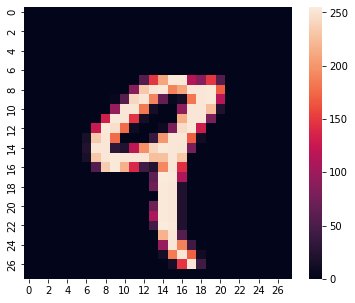

In [17]:
# 사람이 보는 다섯 번째 샘플 (숫자 9의 모습, 2차원 이미지, CNN은 이러한 이미지를 볼 수 있음)
import seaborn
fig, ax = plt.subplots(figsize=(6,5))
seaborn.heatmap(train_images[4])

<Axes: >

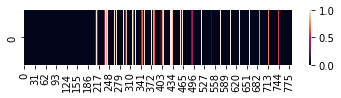

In [18]:
# 인공신경망 입장에서 보는 다섯 번째 샘플 (숫자 9의 모습, 1차원 배열, 과거 인공신경망은 이러한 이미지로 학습)
fig, ax = plt.subplots(figsize=(6,1))
seaborn.heatmap([norm_train_images[4]])

또한, 레이블을 범주형으로 인코딩해야 합니다. 이 단계는 3장에서 자세히 설명하겠습니다:

In [19]:
from tensorflow.keras.utils import to_categorical

cat_train_labels = to_categorical(train_labels)
cat_test_labels = to_categorical(test_labels)

## TODO 4: 범주형 인자

In [20]:
# [5, 0, 4, ...]가 다음과 같이 변환됐습니다.
print(cat_train_labels[0])
print(cat_train_labels[1])
print(cat_train_labels[2])

# Q: 9는 어떻게 표현될까요?
# A: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


이제 신경망을 훈련시킬 준비가 되었습니다. 케라스에서는 `fit` 메서드를 호출하여 훈련 데이터에 모델을 학습시킵니다:

In [21]:
# 입력 이미지, 답안, 전체 훈련 데이터를 몇 번 반복하여 볼 것인지, 한 번에 그림을 몇 장씩 넣을 것인지를 제공
# batch_size만큼의 이미지를 받아들여 각 가중치를 어떻게 바꾸면 좋을지 결정합니다.
network.fit(norm_train_images, cat_train_labels, epochs=5, batch_size=128) 

Epoch 1/5
469/469 [==============================] - 7s 13ms/step - loss: 0.2629 - accuracy: 0.9248
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1077 - accuracy: 0.9685
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0709 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0512 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0383 - accuracy: 0.9887


훈련하는 동안 두 개의 정보가 출력됩니다. 훈련 데이터에 대한 네트워크의 손실과 정확도입니다.

훈련 데이터에 대해 0.989(98.9%)의 정확도를 금방 달성합니다. 이제 테스트 세트에서도 모델이 잘 작동하는지 확인해 보겠습니다:

In [22]:
test_loss, test_acc = network.evaluate(norm_test_images, cat_test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0681 - accuracy: 0.9795


In [23]:
print('test_acc:', test_acc)

test_acc: 0.9794999957084656


테스트 세트의 정확도는 97.8%로 나왔습니다. 훈련 세트 정확도보다는 약간 낮습니다. 훈련 정확도와 테스트 정확도 사이의 차이는 과대적합 때문입니다. 이는 머신 러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 경향을 말합니다. 과대적합은 3장에서 자세하게 논의하겠습니다.

이것으로 첫 번째 예제가 마무리되었습니다. 20줄 미만의 파이썬 코드로 손글씨 숫자를 분류하는 신경망을 만들고 훈련시켰습니다. 다음 장에서 여기서 보았던 코드 하나하나를 상세하게 설명하고 이들이 의미하는 바를 명확하게 설명하겠습니다. 이제 텐서, 신경망에 주입하는 데이터의 저장 형태, 층을 만들어주는 텐서 연산, 신경망을 훈련 샘플로부터 학습시키는 경사 하강법에 대해 알아보겠습니다.

##TODO 5: 152 번째 테스트 이미지 확인

Label of the 152nd test image: 9


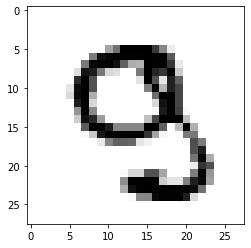

1/1 [==============================] - 0s 115ms/step
[[2.4762464e-04 1.0088810e-09 4.9350341e-04 1.0808897e-02 3.5130887e-09
  3.9087114e-04 1.8704203e-08 7.4217490e-07 2.0386466e-01 7.8419369e-01]]


In [24]:
# 152번째 (인덱스는 151) 테스트 이미지의 레이블은? (print 함수 사용)
# 코드 작성
print("Label of the 152nd test image:", test_labels[151])


# 152번째 테스트 이미지 그려보기
# 코드 작성
digit = test_images[151]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

# Q: 152번째 테스트 이미지를 우리 네트워크는 무엇이라 예측했을까요? (1.2e-01의 뜻은 1.2*10^(-1)=12(%)입니다.)
# A: 9
import numpy as np
print(network.predict(np.array([norm_test_images[151],])))